In [319]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics import pairwise_distances

import seaborn as sns
import warnings

Working from [this](https://towardsdatascience.com/variational-autoencoders-as-generative-models-with-keras-e0c79415a7eb)

In [362]:
!pwd

/Users/alexisrutherford/Desktop/foh_vae


Following [this example](https://towardsdatascience.com/variational-autoencoders-as-generative-models-with-keras-e0c79415a7eb)

## Load the data

In [2]:
df = pd.read_csv('MergedData.csv')

In [4]:
df.head()

,Unnamed: 0,SOC,Probability,Achievement,Independence,Recognition,Relationships,Support,Working Conditions
0,1,11-1011,0.015,6.50,6.835,6.500,5.00,4.33,6.33
1,2,11-1021,0.160,5.33,6.000,5.670,6.33,4.67,6.00
2,3,11-2011,0.039,5.33,5.330,5.165,5.00,4.00,5.08
3,4,11-2021,0.014,6.00,5.670,5.330,5.67,5.00,6.17
4,5,11-2022,0.013,5.33,5.670,4.670,4.00,5.33,5.50


In [10]:
df = pd.read_csv('/Users/alexisrutherford/Desktop/fow_game/jobSkillMat.csv',delimiter='\t')

In [11]:
df.head()

,Job Code,Job Title,Oral Comprehension,Written Comprehension,Oral Expression,Written Expression,Fluency of Ideas,Originality,Problem Sensitivity,Deductive Reasoning,...,Freedom to Make Decisions,Degree of Automation,Importance of Being Exact or Accurate,Importance of Repeating Same Tasks,Structured versus Unstructured Work,Level of Competition,Time Pressure,Pace Determined by Speed of Equipment,Work Schedules,Duration of Typical Work Week
0,13-2011,accountants and auditors,0.625714,0.625714,0.642857,0.588571,0.482857,0.445714,0.588571,0.642857,...,0.2800,0.0400,0.2800,0.2800,0.1600,0.1200,0.2400,0.0000,0.0800,0.8000
1,27-2011,actors,0.590000,0.518571,0.590000,0.518571,0.500000,0.464286,0.464286,0.447143,...,0.2379,0.0223,0.3677,0.1737,0.2502,0.5903,0.4411,0.0120,0.1738,0.2890
2,15-2011,actuaries,0.642857,0.697143,0.697143,0.607143,0.571429,0.517143,0.625714,0.660000,...,0.3030,0.0000,0.6667,0.1515,0.2424,0.2121,0.0606,0.0000,0.0303,0.6364
3,51-9191,adhesive bonding machine operators and tenders,0.445714,0.428571,0.428571,0.321429,0.250000,0.250000,0.428571,0.392857,...,0.4016,0.0845,0.2680,0.1639,0.1401,0.0754,0.4473,0.4077,0.0845,0.4659
4,23-1021,"administrative law judges, adjudicators, and h...",0.731429,0.731429,0.750000,0.714286,0.464286,0.445714,0.588571,0.697143,...,0.7271,0.0000,0.8756,0.5055,0.5603,0.1157,0.6848,0.0053,0.0000,0.5751


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Columns: 232 entries, Job Code to  Duration of Typical Work Week
dtypes: float64(230), object(2)
memory usage: 1.4+ MB


In [19]:
df.shape

(768, 232)

## Which columns are sparse?

In [73]:
df.describe()

,Oral Comprehension,Written Comprehension,Oral Expression,Written Expression,Fluency of Ideas,Originality,Problem Sensitivity,Deductive Reasoning,Inductive Reasoning,Information Ordering,...,Freedom to Make Decisions,Degree of Automation,Importance of Being Exact or Accurate,Importance of Repeating Same Tasks,Structured versus Unstructured Work,Level of Competition,Time Pressure,Pace Determined by Speed of Equipment,Work Schedules,Duration of Typical Work Week
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,...,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.554773,0.508798,0.546559,0.466678,0.401927,0.396213,0.494477,0.493205,0.477630,0.468465,...,0.440473,0.025094,0.453382,0.249605,0.387758,0.139125,0.368022,0.112800,0.034138,0.436528
std,0.095497,0.114504,0.101778,0.134376,0.109723,0.113059,0.093739,0.099233,0.101427,0.073374,...,0.220594,0.055567,0.210617,0.186610,0.211421,0.135400,0.211128,0.165543,0.073157,0.254916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.428571,0.478214,0.357143,0.321429,0.304286,0.428571,0.428571,0.411429,0.428571,...,0.279375,0.000000,0.300000,0.109625,0.226350,0.037975,0.202400,0.000000,0.000000,0.222900
50%,0.554286,0.517143,0.554286,0.464286,0.411429,0.402143,0.482857,0.482857,0.464286,0.464286,...,0.427050,0.000000,0.435050,0.206400,0.356850,0.105800,0.352800,0.036200,0.000000,0.420750
75%,0.607143,0.588571,0.607143,0.571429,0.482857,0.482857,0.554286,0.571429,0.554286,0.517143,...,0.587625,0.027950,0.593150,0.346150,0.513000,0.200250,0.515100,0.162625,0.039100,0.631725
max,0.875714,0.840000,0.857143,0.804286,0.750000,0.785714,0.857143,0.785714,0.821429,0.732857,...,1.000000,0.569100,1.000000,1.000000,1.000000,0.880000,1.000000,0.858500,0.650000,0.991400


In [82]:
(df.iloc[:,2:] > 0.001).sum().sort_values()/df.shape[0]

 Required Level of Education                         0.108073
 On-Site or In-Plant Training                        0.167969
 On-the-Job Training                                 0.183594
 Spend Time Climbing Ladders, Scaffolds, or Poles    0.203125
 Exposed to Whole Body Vibration                     0.279948
                                                       ...   
 Updating and Using Relevant Knowledge               0.996094
 Thinking Creatively                                 0.996094
 Analyzing Data or Information                       0.996094
 Oral Comprehension                                  0.996094
 First Interest High-Point                           1.000000
Length: 230, dtype: float64

0 :  Oral Comprehension - 0.55
1 :  Written Comprehension - 0.51
2 :  Oral Expression - 0.55
3 :  Written Expression - 0.47
4 :  Fluency of Ideas - 0.40
5 :  Originality - 0.40
6 :  Problem Sensitivity - 0.49
7 :  Deductive Reasoning - 0.49
8 :  Inductive Reasoning - 0.48
9 :  Information Ordering - 0.47
10 :  Category Flexibility - 0.45
11 :  Mathematical Reasoning - 0.33
12 :  Number Facility - 0.34
13 :  Memorization - 0.32
14 :  Speed of Closure - 0.34
15 :  Flexibility of Closure - 0.40
16 :  Perceptual Speed - 0.38
17 :  Spatial Orientation - 0.12
18 :  Visualization - 0.40
19 :  Selective Attention - 0.42
20 :  Time Sharing - 0.36
21 :  Arm-Hand Steadiness - 0.32
22 :  Manual Dexterity - 0.30
23 :  Finger Dexterity - 0.38
24 :  Control Precision - 0.32
25 :  Multilimb Coordination - 0.28
26 :  Response Orientation - 0.20
27 :  Rate Control - 0.17
28 :  Reaction Time - 0.23
29 :  Wrist-Finger Speed - 0.16
30 :  Speed of Limb Movement - 0.15
31 :  Static Strength - 0.25
32 :  Expl

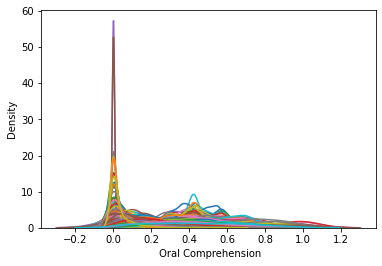

In [267]:
for n,col in enumerate(df.columns[2:]):
    print('{:d} : {:s} - {:.2f}'.format(n,col,df[col].mean()))
    
    sns.kdeplot(df[col])

## Make the VAE

In [2]:
import tensorflow


In [29]:
tensorflow.convert_to_tensor(df.iloc[:,2:].values.T.astype(float))

<tf.Tensor 'Const_9:0' shape=(230, 768) dtype=float64>

In [30]:
tensorflow.convert_to_tensor(df.iloc[1:2,2:].values.T.astype(float))

<tf.Tensor 'Const_10:0' shape=(230, 1) dtype=float64>

In [31]:
tensorflow.convert_to_tensor(df.iloc[1,2:].values.T.astype(float))

<tf.Tensor 'Const_11:0' shape=(230,) dtype=float64>

In [32]:
input_data = tensorflow.keras.layers.Input(shape=(230, ))
# 230 skills/features

In [228]:
nLatent = 5

In [229]:
encoder = tensorflow.keras.layers.Dense(nLatent)(input_data)
# Single layer for now

In [230]:
def sample_latent_features(distribution):
    
    distribution_mean, distribution_variance = distribution
    
    batch_size = tensorflow.shape(distribution_variance)[0]
    
    random = tensorflow.keras.backend.random_normal(shape=(batch_size, tensorflow.shape(distribution_variance)[1]))
    
    return distribution_mean + tensorflow.exp(0.5 * distribution_variance) * random

In [231]:
distribution_mean = tensorflow.keras.layers.Dense(nLatent, name='mean')(encoder)
distribution_variance = tensorflow.keras.layers.Dense(nLatent, name='log_variance')(encoder)
latent_encoding = tensorflow.keras.layers.Lambda(sample_latent_features)([distribution_mean, distribution_variance])

In [232]:
encoder_model = tensorflow.keras.Model(input_data, latent_encoding)
encoder_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 230)]        0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 5)            1155        input_3[0][0]                    
__________________________________________________________________________________________________
mean (Dense)                    (None, 5)            30          dense_5[0][0]                    
__________________________________________________________________________________________________
log_variance (Dense)            (None, 5)            30          dense_5[0][0]                    
____________________________________________________________________________________________

## Try calling the model

In [233]:
out = encoder_model.call(tensorflow.convert_to_tensor(df.iloc[:,2:].values.astype(float)))

## Decoder Layer

In [234]:
decoder_input = tensorflow.keras.layers.Input(shape=(nLatent))

In [235]:
decoder_output = tensorflow.keras.layers.Dense(230)(decoder_input)

In [236]:
decoder_model = tensorflow.keras.Model(decoder_input, decoder_output)

In [237]:
decoder_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 230)               1380      
Total params: 1,380
Trainable params: 1,380
Non-trainable params: 0
_________________________________________________________________


## Combine

In [238]:
encoded = encoder_model(input_data)
decoded = decoder_model(encoded)
autoencoder = tensorflow.keras.models.Model(input_data, decoded)
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 230)]             0         
_________________________________________________________________
model_5 (Model)              (None, 5)                 1215      
_________________________________________________________________
model_6 (Model)              (None, 230)               1380      
Total params: 2,595
Trainable params: 2,595
Non-trainable params: 0
_________________________________________________________________


## Make a loss function

In [239]:
def get_loss(dist_mean,dist_var):
    def get_reconstruction_loss(y_true,y_pred):
        reconstruction_loss = tensorflow.keras.losses.mse(y_true,y_pred)
        reconstruction_loss_batch = tensorflow.reduce_mean(reconstruction_loss)
        return reconstruction_loss_batch*230 # Think this refers to size of input???
    
    def get_kl_loss(dist_mean,dist_var):
        kl_loss = 1 + dist_var - tensorflow.square(dist_mean) -tensorflow.exp(dist_var)
        kl_loss_batch = tensorflow.reduce_mean(kl_loss)
        return kl_loss_batch*(-0.5)
    
    def total_loss(y_true,y_pred):
        reconstruction_loss_batch = get_reconstruction_loss(y_true,y_pred)
        kl_loss_batch = get_kl_loss(dist_mean,dist_var)
        return reconstruction_loss_batch + kl_loss_batch
    return total_loss

In [240]:
autoencoder.compile(loss=get_loss(distribution_mean, distribution_variance), optimizer='adam')

In [241]:
train_data = tensorflow.convert_to_tensor(df.iloc[0:700,2:].values.astype(float))

In [242]:
test_data = tensorflow.convert_to_tensor(df.iloc[701:,2:].values.astype(float))

In [243]:
autoencoder.fit(train_data, train_data, epochs=20, batch_size=64, validation_data=(test_data, test_data),steps_per_epoch=100,\
                validation_steps=30)


Train on 100 samples, validate on 67 samples
Epoch 1/20
100/100 [==============================] - 1s 9ms/step - loss: 23.2238 - val_loss: 8.8383
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 8.4170 - val_loss: 7.7895
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 7.4148 - val_loss: 6.6479
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 6.4077 - val_loss: 6.0515
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 6.0403 - val_loss: 5.8694
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 5.8933 - val_loss: 5.7512
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 5.7755 - val_loss: 5.6042
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 5.6676 - val_loss: 5.5502
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 5.5944 - val_loss: 5.4646
Epoch 10/20
100/100 [==============================] -

In [244]:
trial_data = df.sample(n = 2).iloc[:,2:]

In [245]:
trial_data.shape

(2, 230)

In [274]:
trial_data = df.iloc[4:6,2:].values.astype(float)

In [247]:
trial_data.shape

(2, 230)

## Convert DF slice to TF

In [280]:
trial_data_tf = tensorflow.convert_to_tensor(trial_data)

In [281]:
output = autoencoder.predict(trial_data_tf,steps=10)

Text(0.5, 1.0, 'Encoded & Decoded Original')

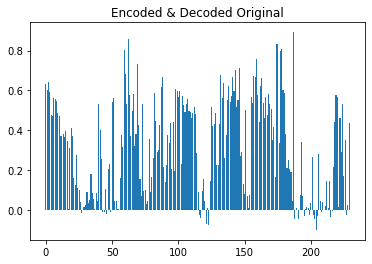

In [282]:
plt.bar(range(len(output[0])),output[0])
plt.title('Encoded & Decoded Original')

Text(0.5, 1.0, 'Original')

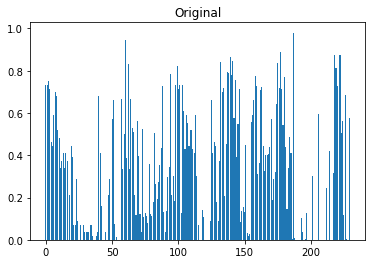

In [283]:
plt.bar(range(len(output[0])),trial_data[0,:])
plt.title('Original')

## Sample

In [253]:
sample_data = tensorflow.convert_to_tensor([1]+[0]*9)

In [254]:
sample_data.shape

TensorShape([Dimension(10)])

In [258]:
sample_data = np.array(([[1]+[0]*(nLatent-1)]))

In [259]:
sample = decoder_model.predict(sample_data,steps=1)

<BarContainer object of 230 artists>

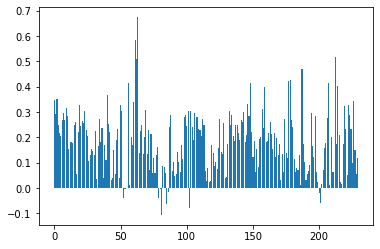

In [260]:
plt.bar(range(len(output[0])),sample[0])

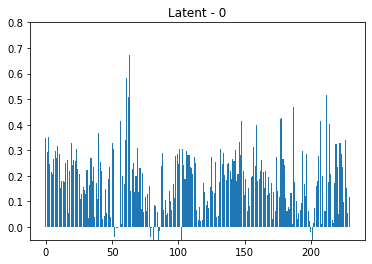

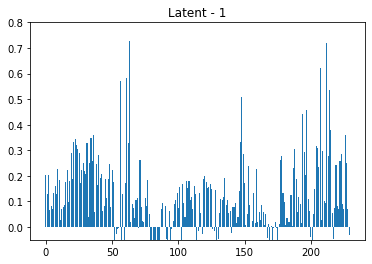

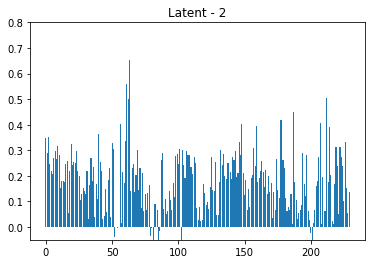

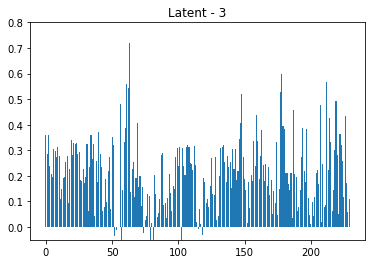

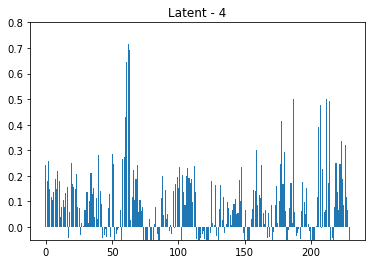

In [268]:
for n in range(nLatent):
    inZeros = np.array([[0]*nLatent])
    inZeros[0,n] = 1.
    sample_data = tensorflow.convert_to_tensor(inZeros)
    
    output = decoder_model.predict(sample_data,steps=10)
    
    plt.bar(range(len(output[0])),output[0])
    plt.title('Latent - '+str(n))
    plt.ylim(-0.05,0.8)
    plt.show()

In [264]:
np.argmax(output[0])

62

## How to evaluate the compression and decoding?

Let us compare typical distance between input/output and typical inter-job distance

In [285]:
distance.cosine(output[0],trial_data[0,:])

0.03776594446253834

In [296]:
trial_data.shape

(768, 230)

In [291]:
j1 = df.sample(1).iloc[0,2:].values
j2 = df.sample(1).iloc[0,2:].values

In [292]:
print('Distance between two random samples : {:.3f}'.format(distance.cosine(j1,j2)))

Distance between two random samples : 0.083


## Do it systematically

In [302]:
trial_data = df.iloc[:,2:].values.astype(float)
trial_data_tf = tensorflow.convert_to_tensor(trial_data)
output = autoencoder.predict(trial_data_tf,steps=1)

In [303]:
trial_data.shape

(768, 230)

In [304]:
output.shape

(768, 230)

### Distances between original and decoded

In [316]:
predictionDistances = []

for nn in range(trial_data.shape[0]):
#    print(distance.cosine(output[nn],trial_data[nn,:]))
    predictionDistances.append(distance.cosine(output[nn],trial_data[nn,:]))

0.054


(-0.05, 1.0)

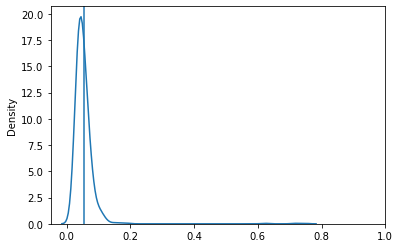

In [329]:
sns.kdeplot(predictionDistances)
plt.axvline(np.mean(predictionDistances))
print('{:.3f}'.format(np.mean(predictionDistances)))
plt.xlim(-0.05,1)

### Distances between existing jobs

In [358]:
pairwiseDistances = []
minDistances = []

for i in range(trial_data.shape[0]):
    tempDistances = np.ones(trial_data.shape[0])
    
    for j in range(trial_data.shape[0]):
        tempDistance = distance.cosine(trial_data[i,:],trial_data[j,:])
        pairwiseDistances.append(tempDistance)
        
        if not i == j:
            tempDistances[j] = tempDistance
        
    minDistances.append(np.min(tempDistances))

0.182


(-0.05, 1.0)

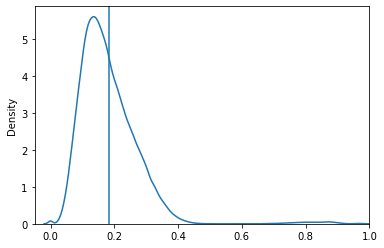

In [359]:
sns.kdeplot(pairwiseDistances)
plt.axvline(np.mean(pairwiseDistances))
print('{:.3f}'.format(np.mean(pairwiseDistances)))
plt.xlim(-0.05,1)

([<matplotlib.axis.XTick at 0x7f8dd4e48490>,
 [Text(0, 0, 'Predictions'), Text(1, 0, 'Pairwise')])

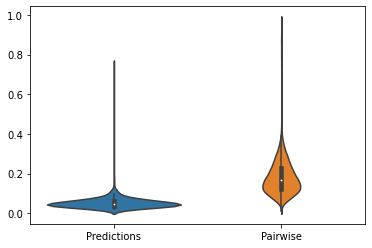

In [336]:
sns.violinplot(data=[predictionDistances,pairwiseDistances])
plt.xticks([0,1],['Predictions','Pairwise'])

### Distances between generated samples and existing jobs

In [338]:
np.random.random(size=nLatent)

array([0.57356073, 0.79512622, 0.92515631, 0.71253061, 0.17239492])

In [342]:
sample_data

<tf.Tensor 'Const_112:0' shape=(5,) dtype=float64>

In [351]:
sampleDistances = []

for n in range(1000):
    latentActivations = np.random.random(size=(1,nLatent))
    sample_data = tensorflow.convert_to_tensor(latentActivations)

    output = decoder_model.predict(sample_data,steps=10)
    
    distances = np.zeros(trial_data.shape[0])
    
    for i in range(trial_data.shape[0]):
        distances[i] = distance.cosine(trial_data[i,:],output[0])
    
    sampleDistances.append(np.min(distances))

([<matplotlib.axis.XTick at 0x7f8dbf536a90>,
 [Text(0, 0, 'Samples'), Text(1, 0, 'Pairwise')])

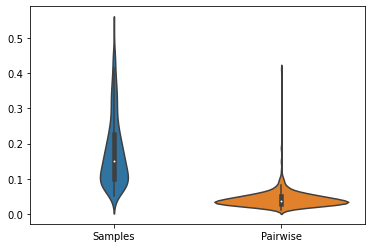

In [361]:
sns.violinplot(data=[sampleDistances,minDistances])
plt.xticks([0,1],['Samples','Pairwise'])